In [1]:
import xarray as xr
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    # https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [3]:
directory = r'C:\Users\steve\Desktop\snowmap_test-20200421T195250Z-001\snowmap_test'

In [4]:
lst = [];
tcc = [];
swe = [];
ndsi = [];
sensorclass = [];

file_list = getListOfFiles(directory)

for file in file_list:
    data = xr.open_rasterio(file)
    lst.append( xr.DataArray(data[0], name='lst') )
    tcc.append( xr.DataArray(data[1], name='tcc') )
    swe.append( xr.DataArray(data[2], name='swe') )
    ndsi.append( xr.DataArray(data[3], name='ndsi') )
    sensorclass.append( xr.DataArray(data[4], name='sensorclass') )

ds_lst = xr.merge(lst)
ds_tcc = xr.merge(tcc)
ds_swe = xr.merge(swe)
ds_ndsi = xr.merge(ndsi)
ds_sensorclass = xr.merge(sensorclass)

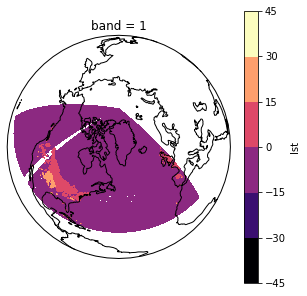

In [5]:
plt.subplots(figsize=(5,5))

ax = plt.axes(projection=ccrs.Orthographic(-50, 70))

ds_lst.lst.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='magma');

ax.set_global();
ax.coastlines();

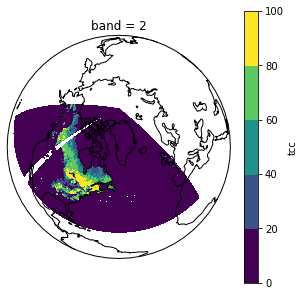

In [6]:
plt.subplots(figsize=(5,5))

ax = plt.axes(projection=ccrs.Orthographic(-50, 70))

ds_tcc.tcc.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis');

ax.set_global();
ax.coastlines();

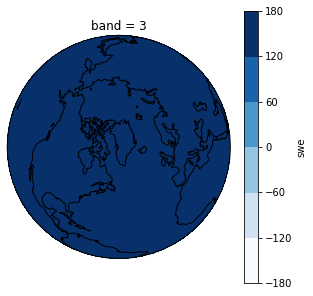

In [7]:
plt.subplots(figsize=(5,5))

ax = plt.axes(projection=ccrs.Orthographic(-50, 70))

ds_swe.swe.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues');

ax.set_global();
ax.coastlines();

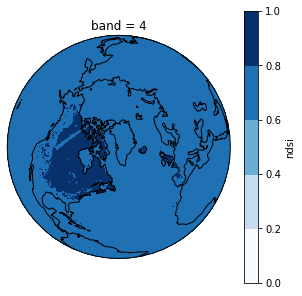

In [8]:
plt.subplots(figsize=(5,5))

ax = plt.axes(projection=ccrs.Orthographic(-50, 70))

ds_ndsi.ndsi.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues');

ax.set_global();
ax.coastlines();

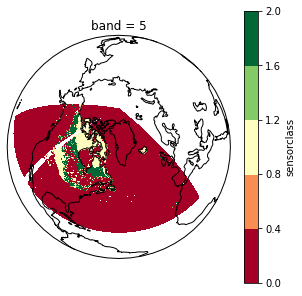

In [9]:
plt.subplots(figsize=(5,5))

ax = plt.axes(projection=ccrs.Orthographic(-50, 70))

ds_sensorclass.sensorclass.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlGn');

ax.set_global();
ax.coastlines();